In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set ipython's max row/col display
pd.set_option('display.max_row', 25)
pd.set_option('display.max_columns', 10)

In [3]:
df = pd.read_csv('../data/EPS_Neighbourhood_Criminal_Incidents.csv')

In [4]:
df.head(20)

,# Incidents,Neighbourhood Description (Occurrence),UCR Violation Type Group (Incident),Incident Reported Year,Incident Reported Quarter,Incident Reported Month
0,3,ABBOTTSFIELD,Assault,2009,Q1,1
1,5,ABBOTTSFIELD,Assault,2009,Q1,2
2,2,ABBOTTSFIELD,Assault,2009,Q1,3
3,2,ABBOTTSFIELD,Assault,2009,Q2,4
4,6,ABBOTTSFIELD,Assault,2009,Q2,5
5,4,ABBOTTSFIELD,Assault,2009,Q2,6
6,3,ABBOTTSFIELD,Assault,2009,Q3,8
7,4,ABBOTTSFIELD,Assault,2009,Q3,9
8,4,ABBOTTSFIELD,Assault,2009,Q4,10
9,6,ABBOTTSFIELD,Assault,2009,Q4,11


In [5]:
df.columns

Index(['# Incidents', 'Neighbourhood Description (Occurrence)',
       'UCR Violation Type Group (Incident)', 'Incident Reported Year',
       'Incident Reported Quarter', 'Incident Reported Month'],
      dtype='object')

In [6]:
df.groupby('Neighbourhood Description (Occurrence)')['# Incidents'].sum().reset_index().head(10)

,Neighbourhood Description (Occurrence),# Incidents
0,ABBOTTSFIELD,711
1,ALBANY,115
2,ALBERTA AVENUE,3391
3,ALBERTA PARK INDUSTRIAL,182
4,ALDERGROVE,635
5,ALLARD,74
6,ALLENDALE,744
7,AMBLESIDE,326
8,ANTHONY HENDAY,36
9,ANTHONY HENDAY BIG LAKE,14


In [7]:
df.groupby(['UCR Violation Type Group (Incident)','Incident Reported Year'])['# Incidents'].sum().reset_index()

,UCR Violation Type Group (Incident),Incident Reported Year,# Incidents
0,Assault,2009,5901
1,Assault,2010,5540
2,Assault,2011,5229
3,Assault,2012,5493
4,Assault,2013,5333
5,Assault,2014,5495
6,Assault,2015,5959
7,Assault,2016,2964
8,Break and Enter,2009,6530
9,Break and Enter,2010,5384


In [8]:
new_df = df.groupby('UCR Violation Type Group (Incident)')['# Incidents'].sum().reset_index()
new_df

,UCR Violation Type Group (Incident),# Incidents
0,Assault,41914
1,Break and Enter,38056
2,Homicide,230
3,Robbery,8716
4,Sexual Assaults,5791
5,Theft From Vehicle,61890
6,Theft Of Vehicle,31516
7,Theft Over $5000,2539


In [9]:
incident_amount = new_df.as_matrix(columns=new_df.columns[1:])
incident_amount_list = []
for i in incident_amount:
    incident_amount_list.append(i[0])
incident_amount = np.asarray(incident_amount_list)
incident_amount

array([41914, 38056,   230,  8716,  5791, 61890, 31516,  2539])

In [10]:
incident_column = new_df.as_matrix(columns=new_df.columns[0:1])
incident_column

array([['Assault'],
       ['Break and Enter'],
       ['Homicide'],
       ['Robbery'],
       ['Sexual Assaults'],
       ['Theft From Vehicle'],
       ['Theft Of Vehicle'],
       ['Theft Over $5000']], dtype=object)

In [11]:
incident_column_list = []
for i in incident_column:
    incident_column_list.append(i[0])
incident_column_list

['Assault',
 'Break and Enter',
 'Homicide',
 'Robbery',
 'Sexual Assaults',
 'Theft From Vehicle',
 'Theft Of Vehicle',
 'Theft Over $5000']

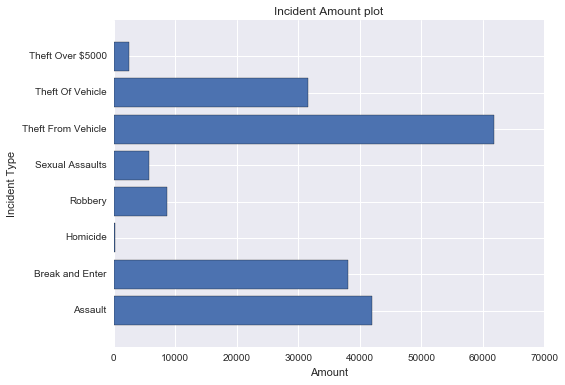

In [12]:
plt.ylabel('Incident Type')
plt.xlabel('Amount')
y_pos = np.arange(len(incident_column_list))
plt.barh(y_pos, incident_amount, align='center')
plt.yticks(y_pos, incident_column_list)
plt.title('Incident Amount plot')
plt.tight_layout()
plt.savefig('histogram_by_incident_category.png')